Algoritmo de Grover

Considere utilizar um ambiente virtual venv ou conda para executar seu código.

Este código de exemplo foi preparado usando Python 3.11 e as dependências estão no arquivo requirements.txt, e podem ser instaladas com o comando a seguir:

'''python install -r requirements.txt'''



Para executar o algoritmo de Grover usando a classe Grover, primeiramente, precisamos especificar um oráculo para o circuito do algoritmo de Grover. No exemplo a seguir, usamos o QuantumCircuit como o oráculo do algoritmo de Grover. No entanto, há várias outras classes que podemos usar como o oráculo do algoritmo de Grover. Falaremos sobre elas mais adiante.

Observe que o oráculo para Grover deve ser um oráculo de inversão de fase. Ou seja, ele multiplica os amplitudes dos "estados bons" por um fator de -1. Explicaremos mais adiante como converter um oráculo de inversão de bits em um oráculo de inversão de fase.

In [6]:
from qiskit import Aer
from qiskit import QuantumCircuit
from qiskit.algorithms import AmplificationProblem

# Ferramentas para visualização
from qiskit.visualization import plot_histogram, plot_state_qsphere

1. Crie um oráculo

Para iniciar, vamos considerar um cenário em que buscamos o estado '11'.
No bloco a seguir, defina o oráculo que marca este estado como uma boa solução.

In [11]:
# Estado desejado, que se quer encontrar
estado_desejado = ['11']

# Defina o oráculo que marca o estado '11' como solução
oraculo = QuantumCircuit(2)
oraculo.cz(0,1)


Teste a marcação feita pelo seu oráculo

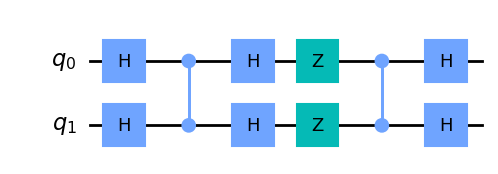

In [12]:

teste_oraculo = QuantumCircuit(2)
teste_oraculo.h([0,1])
teste_oraculo.compose(oraculo, inplace=True)
teste_oraculo.h([0,1])
teste_oraculo.z([0,1])
teste_oraculo.compose(oraculo, inplace=True)
teste_oraculo.h([0,1])
teste_oraculo.draw('mpl')


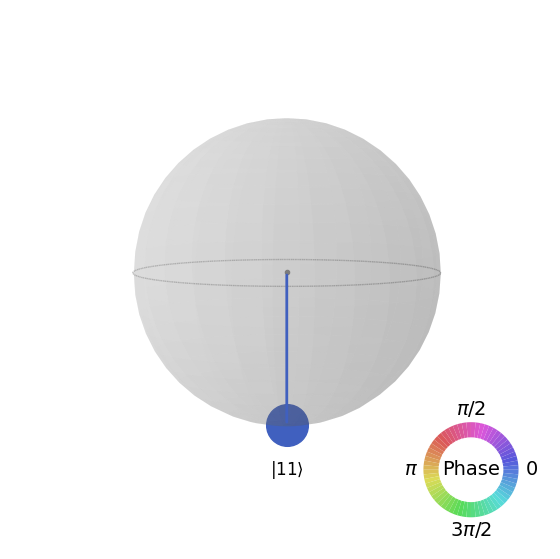

In [9]:
plot_state_qsphere(teste_oraculo)

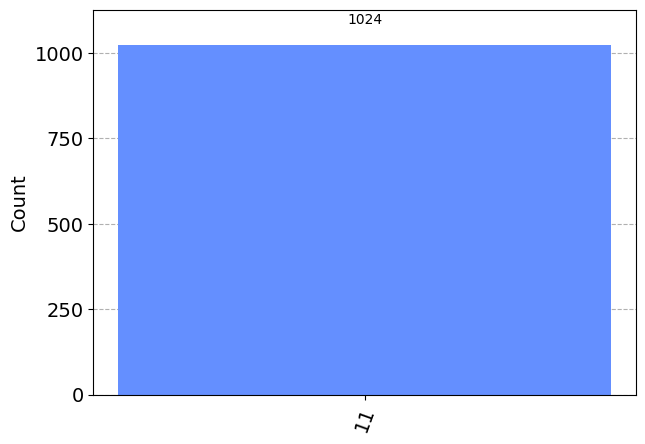

In [18]:
teste_oraculo.measure_all()

simulador = Aer.get_backend('qasm_simulator')
resultado_simulador = simulador.run(teste_oraculo).result()
quantidade = resultado_simulador.get_counts()
plot_histogram(quantidade)

Retornando à implementação de Grover

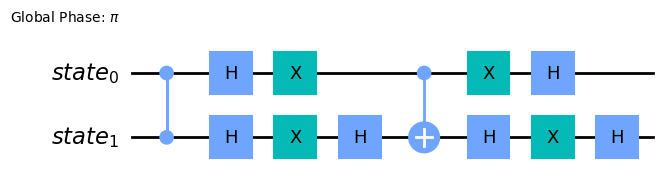

In [17]:
problema = AmplificationProblem(oraculo, is_good_state=estado_desejado)

# Circuitos de algoritmo são exibidos como uma única caixa,
# por isso é necessário executar o .decompose() para de uma
# forma expandida os gates que o compoem
problema.grover_operator.decompose().draw(output='mpl')


In [26]:
from qiskit.algorithms import Grover
from qiskit.primitives import Sampler

grover = Grover(sampler=Sampler())
resultado = grover.amplify(problema)

print('Tipo de resultado:', type(resultado))
print()
print('Sucesso!' if resultado.oracle_evaluation else 'Falha!')
print('Principal medida:', resultado.top_measurement)

Tipo de resultado: <class 'qiskit.algorithms.amplitude_amplifiers.grover.GroverResult'>

Sucesso!
Principal medida: 11
